# Import library

In [269]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns 
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error, r2_score
import mplfinance as mpf
from statsmodels.tsa.stattools import acf
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# Import data 

In [146]:
import yfinance as yahooFinance
 
 
gold_price = yahooFinance.Ticker("GC=F")

In [148]:
Data = gold_price.history(period="2y")

In [149]:
Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3,0,0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638,0,0
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000,16389,0,0
2020-03-31,1618.699951,1621.000000,1576.000000,1583.400024,2874,0,0
2020-04-01,1570.000000,1600.000000,1570.000000,1578.199951,2158,0,0
...,...,...,...,...,...,...,...
2022-03-21,1925.400024,1928.599976,1925.000000,1928.599976,5,0,0
2022-03-22,1920.699951,1920.699951,1920.699951,1920.699951,26,0,0
2022-03-23,1936.599976,1936.599976,1936.599976,1936.599976,204,0,0


# Upsampling

In [150]:
data = Data.resample('D').mean()
data.head(7)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3.0,0.0,0.0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638.0,0.0,0.0
2020-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000,16389.0,0.0,0.0
2020-03-31,1618.699951,1621.000000,1576.000000,1583.400024,2874.0,0.0,0.0
2020-04-01,1570.000000,1600.000000,1570.000000,1578.199951,2158.0,0.0,0.0


In [151]:
price= data.interpolate(method = 'linear')
price.head(7)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3.0,0.0,0.0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638.0,0.0,0.0
2020-03-28,1629.666667,1633.533366,1618.333333,1623.266683,72555.0,0.0,0.0
2020-03-29,1635.433309,1643.166707,1612.766642,1622.633341,44472.0,0.0,0.0
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000,16389.0,0.0,0.0
2020-03-31,1618.699951,1621.000000,1576.000000,1583.400024,2874.0,0.0,0.0
2020-04-01,1570.000000,1600.000000,1570.000000,1578.199951,2158.0,0.0,0.0


In [152]:
price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3.0,0.0,0.0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638.0,0.0,0.0
2020-03-28,1629.666667,1633.533366,1618.333333,1623.266683,72555.0,0.0,0.0
2020-03-29,1635.433309,1643.166707,1612.766642,1622.633341,44472.0,0.0,0.0
2020-03-30,1641.199951,1652.800049,1607.199951,1622.000000,16389.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-21,1925.400024,1928.599976,1925.000000,1928.599976,5.0,0.0,0.0
2022-03-22,1920.699951,1920.699951,1920.699951,1920.699951,26.0,0.0,0.0
2022-03-23,1936.599976,1936.599976,1936.599976,1936.599976,204.0,0.0,0.0


In [164]:
price.to_csv('Gold.csv')

In [204]:
df = pd.read_csv('Gold.csv')  ### we will use this df data to perform candlestick charts in visualizations

In [205]:
df['Date'] = pd.to_datetime(df['Date'])

In [206]:
df.drop(columns=['Dividends','Stock Splits','Volume'],inplace=True)

# Data Understanding

In [207]:
price.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [297]:
price.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [298]:
price.shape

(730, 7)

In [299]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2020-03-26 to 2022-03-25
Freq: D
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          730 non-null    float64
 1   High          730 non-null    float64
 2   Low           730 non-null    float64
 3   Close         730 non-null    float64
 4   Volume        730 non-null    float64
 5   Dividends     730 non-null    float64
 6   Stock Splits  730 non-null    float64
dtypes: float64(7)
memory usage: 61.8 KB


In [300]:
price.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,730.0,1818.633700,78.979447,1570.000000,1769.575043,1806.349976,1875.483327,2053.600098
High,730.0,1828.494180,79.337864,1600.000000,1779.025024,1815.400024,1885.225037,2072.000000
Low,730.0,1808.809794,78.143150,1570.000000,1761.958333,1800.066650,1869.425018,2040.000000
Close,730.0,1818.960888,78.594921,1578.199951,1768.424988,1809.099976,1877.400024,2051.500000
Volume,730.0,4302.590411,22896.200582,0.000000,102.500000,276.500000,727.437500,209835.000000
Dividends,730.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stock Splits,730.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [212]:
len(df)

730

# Data Visualization

<AxesSubplot:>

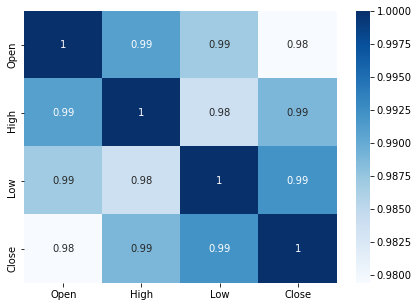

In [219]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [235]:
fig = px.line(price,title='Gold Price',labels={'Date':'Months','value':'Daily Gold price'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show() 

In [270]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [246]:
from statsmodels.tsa.stattools import acf
# Auto-Correlation Plot useful to analyze and visualize Correlation of data with its lags.
acf_df = pd.DataFrame({'ACF':acf(df["Close"],nlags=df.shape[0])})
acf_df['Upper Level'] = 1.96 / 1 / (df.shape[0] ** 0.5 )
acf_df['Lower Level'] = - 1.96 / 1 / (df.shape[0] ** 0.5 )
fig = px.line(acf_df,title='Autocorrelation Plot',labels={'index':'Lags','value':'Correlation'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show()

## Function visualise the lag plot

In [251]:
# This function will generate an Interactive Scatter Plot to show lags with Previous data
def lag_plot(lags=1): 
    x = df['Close']
    y = df['Close'].shift(lags)
    title = 'Lag Plot of lag ' + str(lags)
    fig = px.scatter(x=x,y=y,trendline='ols',trendline_color_override='red', title = title, 
                      labels={'x':'Gold Prices','y':'lag of {} on Gold Prices'.format(lags)})
    fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
    fig.show() 

## Lag plot

In [252]:
lag_plot(1)

In [255]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom_df = seasonal_decompose(price['Close'],period=12)
fig = px.line(decom_df.trend,title='Trend')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show()
fig = px.line(decom_df.seasonal,title='Seasonality')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show()
fig = px.line(decom_df.resid,title='Residuals')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show()

# Stationarity Check

In [261]:
from statsmodels.tsa.stattools import adfuller, kpss
def test_stationarity(data):
    res = adfuller(data.dropna())
    print('\nADF Test P Value :',round(res[1],5))
    if res[1] > 0.05 :
        print('This data is not Stationary as per ADF Test')
    else :
        print('This data is Stationary as per ADF Test')
    res = kpss(data.dropna())
    print('\nKPSS Test P Value :',round(res[1],5))
    if res[1] < 0.05 :
        print('This data is not Stationary as per KPSS Test')
    else :
        print('This data is Stationary as per KPSS Test')

In [263]:
test_stationarity(price['Close'])


ADF Test P Value : 0.06668
This data is not Stationary as per ADF Test

KPSS Test P Value : 0.1
This data is Stationary as per KPSS Test


In [264]:
test_stationarity(price['Close'].diff())


ADF Test P Value : 0.0
This data is Stationary as per ADF Test

KPSS Test P Value : 0.1
This data is Stationary as per KPSS Test


In [273]:
test_stationarity(price['Close'].diff().diff())


ADF Test P Value : 0.0
This data is Stationary as per ADF Test

KPSS Test P Value : 0.1
This data is Stationary as per KPSS Test


In [274]:
px.line(price['Close'].diff().diff())

# Model Building

In [301]:
price.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True)

In [302]:
x = price.drop(['Close'],axis =1)
y = price['Close']

# Model training, testing and evalution 

In [303]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=12)

In [304]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [305]:
model = RandomForestRegressor()

In [332]:

grid_rf = {
'n_estimators': [20, 50, 100,15,25,75],  
'max_depth': np.arange(1, 20, 1,),  
'min_samples_split': [2, 10, 5], 
'min_samples_leaf': np.arange(1,25,10,   dtype=int),  
'bootstrap': [True, False], 
'random_state': [10,20,40,50,42,2]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 50, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [335]:
model = RandomForestRegressor(n_estimators=50, random_state=50, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[1785.2890265  1867.74437062 1729.2772702  1759.00832113 1754.19636112
 1829.04446503 1889.9284002  1719.1826716  1810.5470781  1649.91065918
 1969.68200562 1684.50499451 1789.33281005 1723.4795525  1813.97960487
 1881.96918597 1689.23954053 1719.87391769 1800.10620526 1776.55892142
 1775.89036438 1799.50038006 1781.2789869  1782.85535334 1802.40816981
 1777.74982358 1807.24415746 1861.30398682 1980.7139681  1892.89931885
 1818.69949334 1879.93028832 1808.95890017 1805.82584094 1988.07997233
 1836.54657846 1864.8825956  1770.75499697 1813.06052208 1801.99217858
 1789.18232005 1773.81145049 1932.38782945 1852.73060242 1875.05466146
 1782.0234499  1774.36830486 1865.09404728 1737.26284834 1873.7051792
 1790.40567075 1717.64387146 1736.85305014 1795.96773781 1789.5824066
 1756.70746871 1883.77767881 1799.40135912 1777.76835015 1812.85316234
 1709.31303684 1878.81146269 2020.78399658 1930.86970013 1785.74643499
 1736.3973084  1726.12758999 1928.68452447 1715.55340061 1853.93796875
 1809.84

In [336]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5.8431
Mean Squared Error: 82.2577
Root Mean Squared Error: 9.0696
(R^2) Score: 0.9865
Train Score : 99.85% and Test Score : 98.65% using Random Tree Regressor.
Accuracy: 99.68 %.


In [337]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=data.index[-1], periods=len(predict), freq="D"))
#predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values

onemonth_df = pd.DataFrame(predictions[:30])
#onemonth_df.to_csv("one-month-predictions.csv")


In [338]:
onemonth_df

,Predictions
2022-03-25,1785.289026
2022-03-26,1867.744371
2022-03-27,1729.277270
2022-03-28,1759.008321
2022-03-29,1754.196361
2022-03-30,1829.044465
2022-03-31,1889.928400
2022-04-01,1719.182672
2022-04-02,1810.547078
2022-04-03,1649.910659


In [341]:
fig = px.line(onemonth_df,title='Gold Price',labels={'Date':'Months','value':'Daily Gold price'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show() 